<a href="https://colab.research.google.com/github/Ivanova-Daria/individual-task/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

In [10]:
arr=np.array([[1,2],[3,4]])
linalg.det(arr)

-2.0

In [20]:
arr=np.array([[3,2],[6,4]])
linalg.det(arr)

0.0

In [22]:
arr=np.array([[1,2],[3,4]])
linalg.inv(arr)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

# scipy.interpolate

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
x = np.linspace(0,4,12)
y=np.cos(x**2/3+4)
print(x,y)

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ] [-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


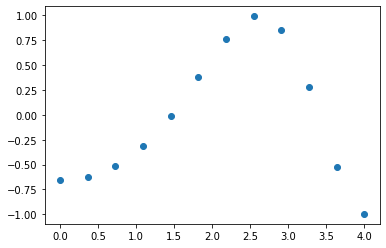

In [19]:
plt.plot(x,y,"o")

In [23]:
from scipy.interpolate import interp1d
f1 = interp1d(x,y,kind = 'linear')
f2 = interp1d(x,y,kind = 'cubic')

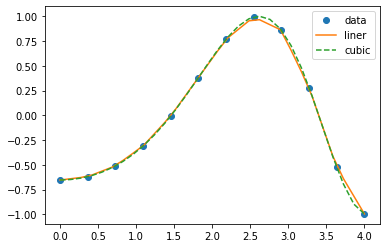

In [28]:
xnew = np.linspace(0,4,30)
plt.plot(x,y,"o",xnew,f1(xnew),"-", xnew,f2(xnew),"--")
plt.legend(["data","liner","cubic","nearest"],loc="best")
plt.show()

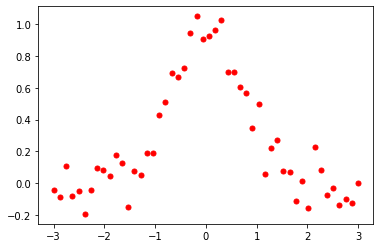

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline
x = np.linspace(-3,3,50)
y=np.exp(-x**2)+0.1*np.random.randn(50)
plt.plot(x,y,'ro',ms = 5)
plt.show()

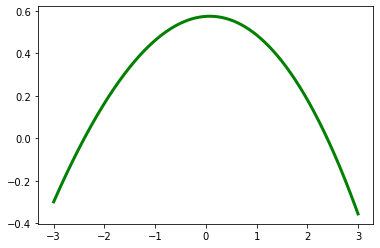

In [34]:
spl = UnivariateSpline(x,y)
xs = np.linspace(-3,3,1000)
plt.plot(xs,spl(xs),'g',lw =3)
plt.show()

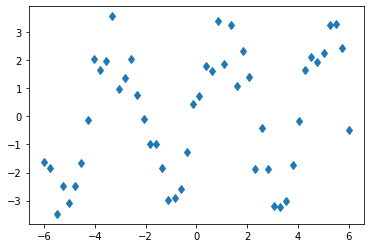

In [35]:
from scipy import optimize
x_data = np.linspace(-6,6,num=50)
y_data = 2.9*np.sin(1.5*x_data)+np.random.normal(size=50)
plt.plot(x_data,y_data,'d',lw=3)

In [37]:
def test_func(x,a,b):
  return a*np.sin(b*x)

In [38]:
params,params_covariance = optimize.curve_fit(test_func,x_data,y_data,p0=[2,2])
print(params)

[2.79026201 1.49685382]


<function matplotlib.pyplot.show>

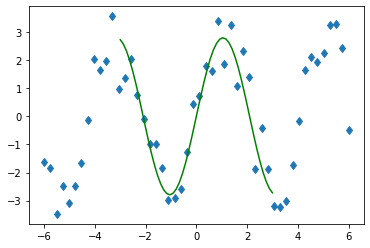

In [40]:
a=params[0]
b=params[1]
y1=test_func(x,a,b)
plt.plot(x_data,y_data,'d',x,y1,'g')
plt.show

# Задание 1

Text(0, 0.5, 'min and max temperature')

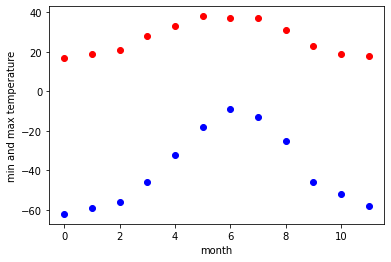

In [56]:
temp_max=np.array([17,19,21,28,33,38,37,37,31,23,19,18])
temp_min=np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52, -58])

months=np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('month')
plt.ylabel('min and max temperature')


In [59]:
from scipy import optimize
def yearly_temps(times, avg, amp1, time_offset):
  return (avg+amp1*np.cos((times+time_offset)*2*np.pi/times.max()))

res_max, cov_max=optimize.curve_fit(yearly_temps, months, temp_max, [20,10,0])
res_min, cov_min=optimize.curve_fit(yearly_temps, months, temp_min, [-40,20,0])

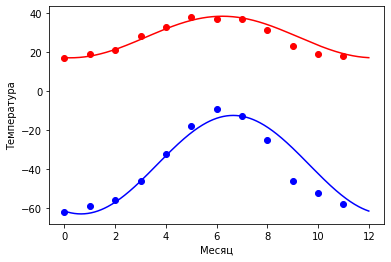

In [62]:
days= np.linspace(0,12,num=365)
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min),'b-')
plt.xlabel('Месяц')
plt.ylabel('Температура')
plt.show()
